<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/NearestNeighbors_digits%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

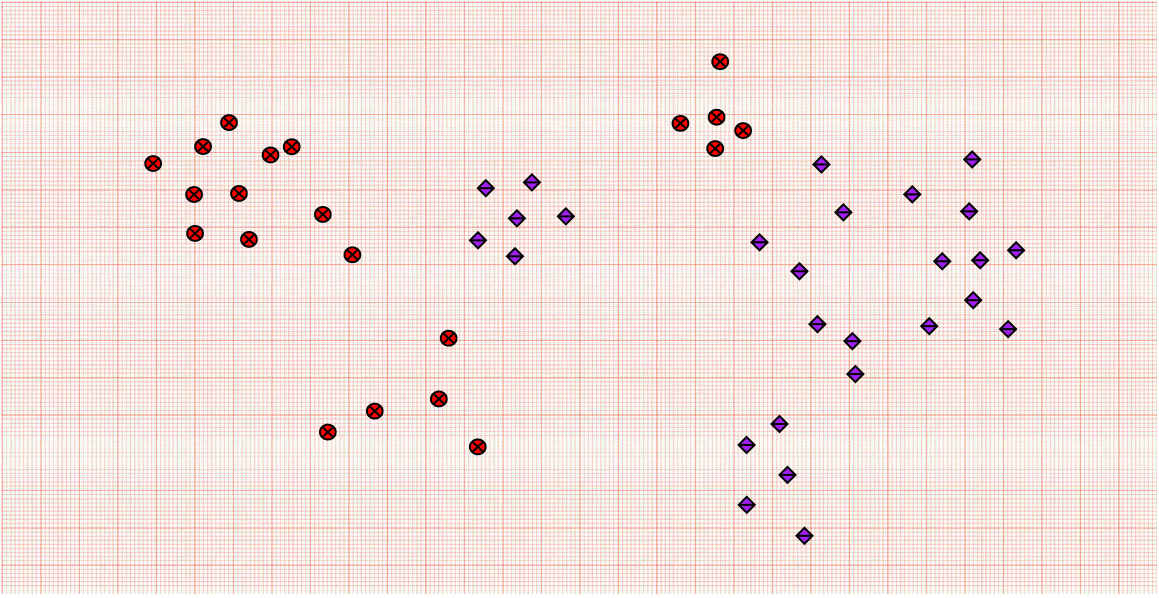

In [1]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/nearest_neighbor_binary_class_distribution.png'))
img

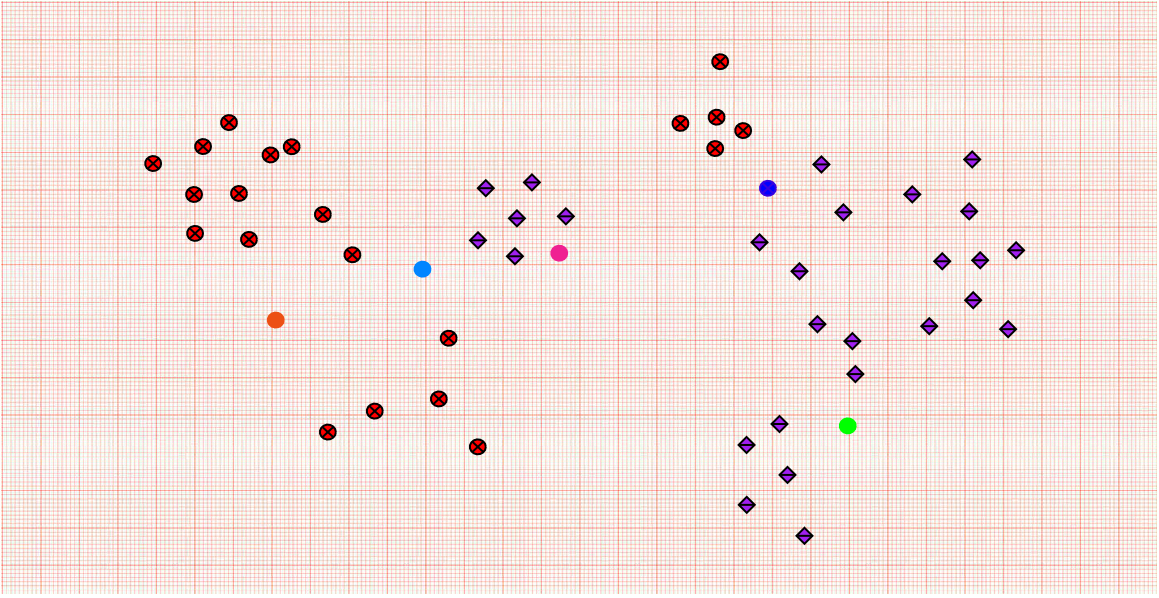

In [2]:
img_2 = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/nearest_neighbor_binary_class_distribution_testdata.png'))
img_2

In [3]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn import tree

digits = load_digits()
print('digits data shape:', digits.data.shape)
A = digits.data
print('digits target shape:', digits.target.shape)
print('Features of the first five samples of digits data:')
print(digits.data[0:5])

digits data shape: (1797, 64)
digits target shape: (1797,)
Features of the first five samples of digits data:
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.

In [4]:
print('unique classes:', np.unique(digits.target))
n = digits.data.shape[0]
d = digits.data.shape[1]
print('n:', n, 'd:', d)

unique classes: [0 1 2 3 4 5 6 7 8 9]
n: 1797 d: 64


In [5]:
y = 1.0 * np.ones([A.shape[0], 1])
for i in range(digits.target.shape[0]):
  if digits.target[i] == 3:
    y[i] = 1
  else:
    y[i] = -1


In [6]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)

In [7]:
num_train = int(0.8 * n)
num_test = n - num_train
print('num_train:', num_train, 'num_test:', num_test)

num_train: 1437 num_test: 360


In [8]:
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('train features shape:', train_features.shape)
print('train label shape:', train_label.shape)


train features shape: (1437, 64)
train label shape: (1437, 1)


In [9]:
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('test features shape:', test_features.shape)
print('test label shape:', test_label.shape)

test features shape: (360, 64)
test label shape: (360, 1)


In [10]:
test_data_index = np.random.randint(0, num_test)
print('test data index:', test_data_index)
x_test = train_features[test_data_index]
y_test = train_label[test_data_index]
print('x_test:', x_test, 'y_test:', y_test)

test data index: 2
x_test: [ 0.  0.  2. 13. 16. 16. 16. 12.  0.  0.  9. 15.  8.  9. 16.  7.  0.  0.
 10. 10.  0.  6. 14.  1.  0.  1. 16.  5.  1. 16.  4.  0.  0.  0.  4.  0.
  9. 13.  0.  0.  0.  0.  0.  4. 15.  1.  0.  0.  0.  0.  0. 14. 10.  0.
  0.  0.  0.  0.  3. 15.  4.  0.  0.  0.] y_test: [-1.]


In [12]:
k = 13

distance_list = []
for i in range(num_train):
  distance_list.append(np.linalg.norm(train_features[i] - x_test, ord = np.inf))

distance_arr = np.array(distance_list)

index_sorted = np.argsort(distance_arr)

print('indices of the top k points:', index_sorted[0:k], 'labels of the top k points:', train_label[index_sorted[0:k]])

if np.sum(train_label[index_sorted[0:k]]) > 0:
  pred_label = +1
else:
  pred_label = -1

print('actual label:', y_test, 'predicted_label:', pred_label)

indices of the top k points: [   2  158  481 1052  369  740  991  227  220   39  671  346  617] labels of the top k points: [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
actual label: [-1.] predicted_label: -1


In [19]:
k = 11

distance_list = []
for i in range(num_train):
  distance_list.append(np.linalg.norm(train_features[i] - x_test, ord = 2))

distance_arr = np.array(distance_list)

index_sorted = np.argsort(distance_arr)

print('indices of the top k points:', index_sorted[0:k], 'labels of the top k points:', train_label[index_sorted[0:k]])

top_k_labels = train_label[index_sorted[0:k]]
index_class_1, _ = np.where(top_k_labels == 1)
index_class_minus1, _ = np.where(top_k_labels == -1)

#print(index_sorted[0:k])
#print(train_label[index_sorted[0:k]])
#print(index_sorted[index_class_1])
#print(top_k_labels[index_class_1])
#print(index_sorted[index_class_minus1])
#print(top_k_labels[index_class_minus1])
#print(distance_arr[index_sorted[index_class_minus1]])
#print(index_class_1)
#print(index_class_minus1)
#print(top_k_labels[index_class_1].ravel())

weighted_score_class_1 = -np.inf
weighted_score_class_minus1 = -np.inf

if len(index_class_1) > 0:
  weighted_score_class_1 = np.dot(1./distance_arr[index_sorted[index_class_1]], train_label[index_sorted[index_class_1]])

if len(index_class_minus1) > 0:
  weighted_score_class_minus1 = np.dot(1./distance_arr[index_sorted[index_class_minus1]], train_label[index_sorted[index_class_minus1]])

print('weighted score for class +1:', weighted_score_class_1, 'weighted score for class -1:', weighted_score_class_minus1)

if weighted_score_class_1 > weighted_score_class_minus1:
  pred_label = +1
else:
  pred_label = -1

print('actual label:', y_test, 'predicted label:', pred_label)

indices of the top k points: [   2  158  369  227 1052  481  740   39  991  220  346] labels of the top k points: [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[ 0.         13.78404875 16.2788206  17.74823935 18.08314132 18.60107524
 19.74841766 20.80865205 24.10394159 30.0499584  31.09662361]
weighted score for class +1: -inf weighted score for class -1: [-inf]
actual label: [-1.] predicted label: -1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
